In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
plt.rcParams['figure.dpi'] = 150

print(f"Pandas Version :- {pd.__version__}")
print(f"Numpy Version :- {np.__version__}")
print(f"Matplotlib Version :- {matplotlib.__version__}")
print(f"Seaborn Version :- {sns.__version__}")

Pandas Version :- 1.5.1
Numpy Version :- 1.23.4
Matplotlib Version :- 3.6.2
Seaborn Version :- 0.12.1


In [2]:
df_train = pd.read_csv('data/train.csv', parse_dates=['date'])

df_train.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [3]:
# Checking if date column has been parsed correctly or not.
df_train['date'].dtype

dtype('<M8[ns]')

In [4]:
df_train.isna().sum()

row_id      0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [5]:
df_train.describe()

,row_id,num_sold
count,26298.000000,26298.000000
mean,13148.500000,387.533577
std,7591.723026,266.076193
min,0.000000,70.000000
25%,6574.250000,190.000000
50%,13148.500000,315.000000
75%,19722.750000,510.000000
max,26297.000000,2884.000000


In [12]:
df_train['date'].is_monotonic_increasing

# This shows that the date column is already sorted in ascending order

True

## Plotting Time - Series Data

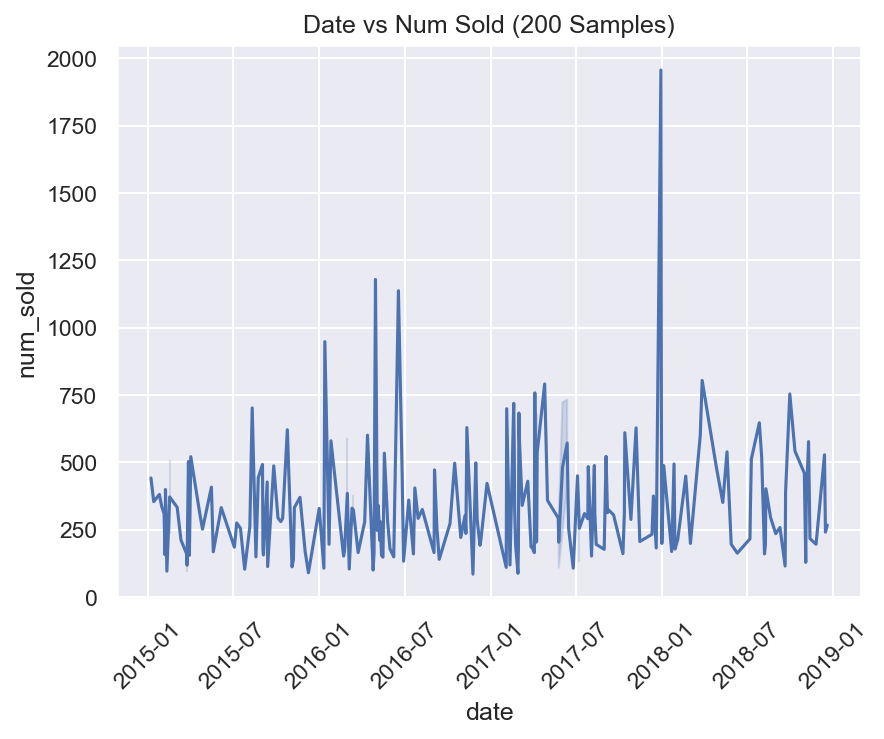

In [42]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='date', y='num_sold', data=df_train.sample(n=200, random_state=38))
plt.xticks(rotation=45)
plt.title('Date vs Num Sold (200 Samples)')
plt.show()

<AxesSubplot: title={'center': 'Quaterly Sales'}, xlabel='Date', ylabel='Num Sold'>

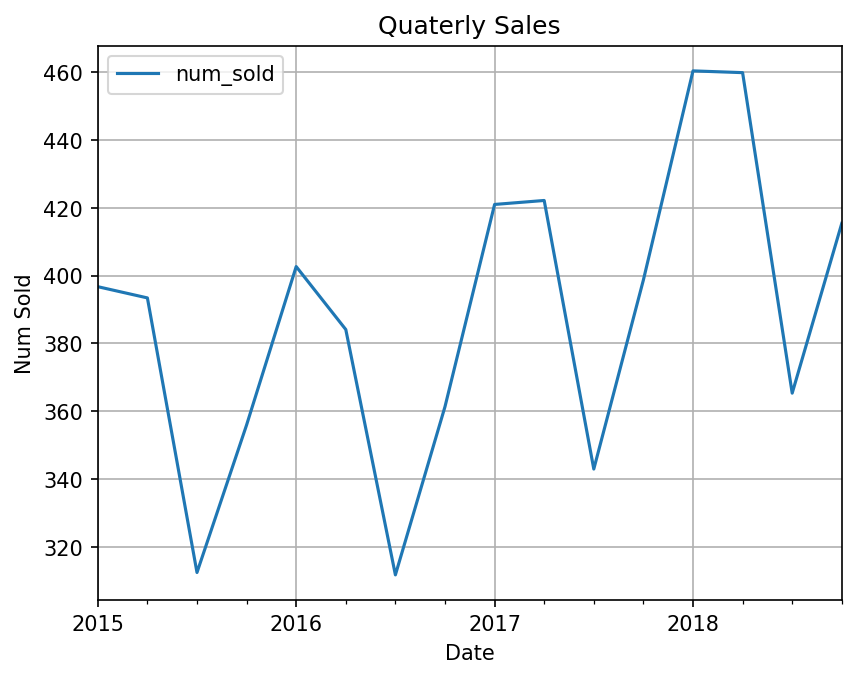

In [39]:
test = pd.read_csv('data/train.csv', parse_dates=True, index_col='date')

test['num_sold'].resample('Q').mean().plot(kind='line', title='Quaterly Sales', legend=True, xlabel='Date', ylabel='Num Sold', grid=True)

## Visualising Different Features of the DataSet

In [53]:
df_train.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [54]:
df_train['store'].value_counts()

KaggleMart    13149
KaggleRama    13149
Name: store, dtype: int64

### Plotting Which Store Sold How Many Products 

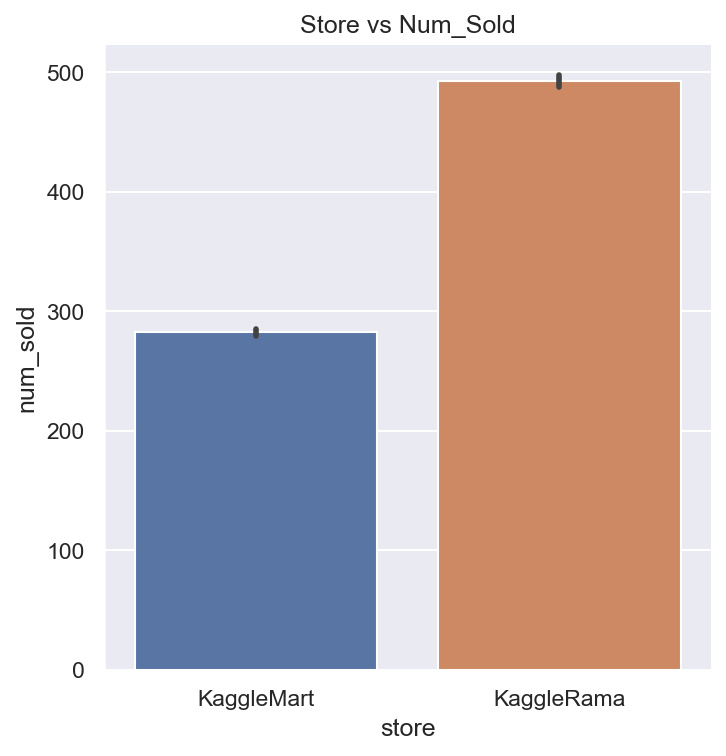

In [99]:
ax = sns.catplot(data=df_train, x='store', y='num_sold', kind='bar', margin_titles=True)
plt.title("Store vs Num_Sold")
plt.show()

### Plotting Which Store Sold Which Product and How Many of Them

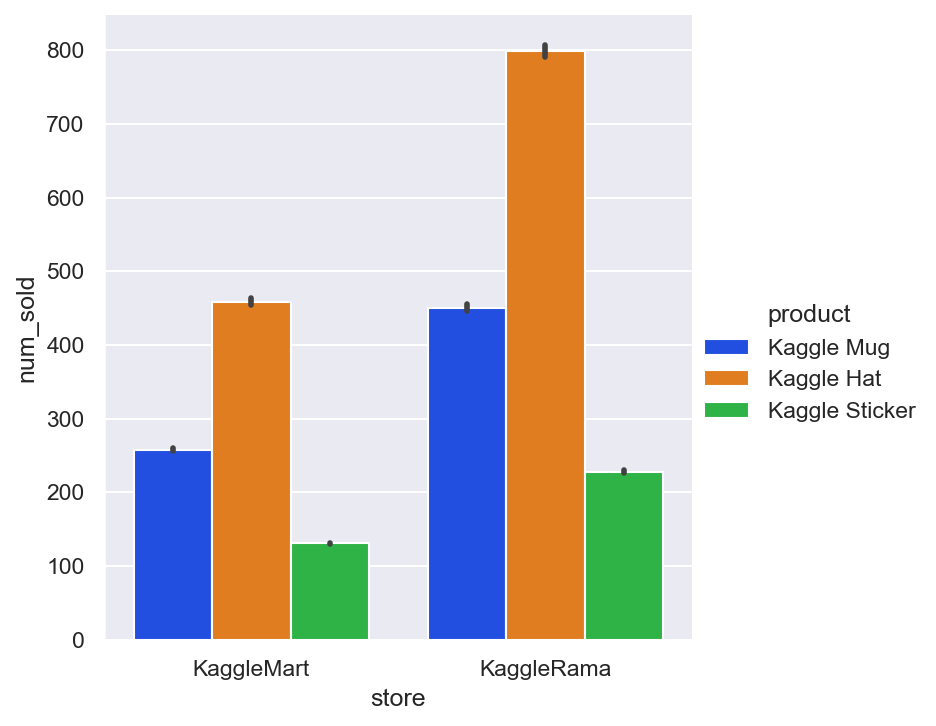

In [107]:
sns.catplot(data=df_train, x='store', y='num_sold', hue='product', kind='bar', palette='bright')

### Detecting Outliers

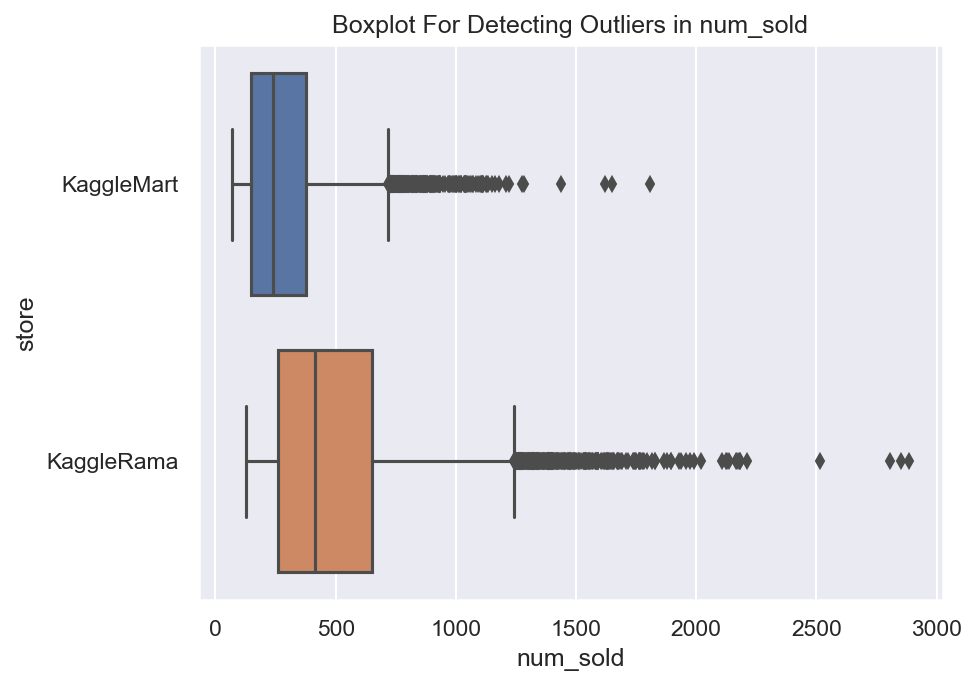

In [146]:
sns.boxplot(data=df_train, x='num_sold', y='store') 
plt.title('Boxplot For Detecting Outliers in num_sold')
plt.show()

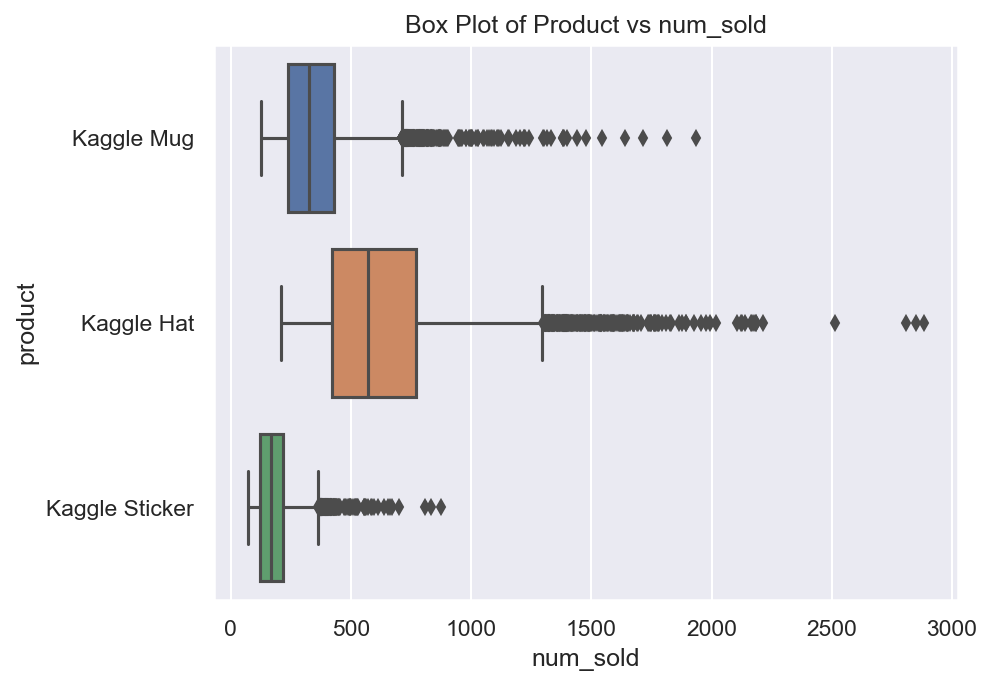

In [150]:
sns.boxplot(data=df_train, x='num_sold', y='product')
plt.title('Box Plot of Product vs num_sold')
plt.show()

- After seeing both the above box plots, we can confirm that there are a lot of outliers in the `num_sold` feature.
- Outliers basically means that the particular value falls outside of the 75th percentile range.
- We can confirm that by the following code.

In [152]:
# Defining the quartiles :- 

q1 = df_train['num_sold'].quantile(0.25)
q3 = df_train['num_sold'].quantile(0.75)

IQR = q3 - q1

print(f"25th Quartile :- {q1}")
print(f"75th Quartile :- {q3}")
print(f"IQR (75th Quartile - 25th Quartile) :- {IQR}")

25th Quartile :- 190.0
75th Quartile :- 510.0
IQR (75th Quartile - 25th Quartile) :- 320.0


In [154]:
# Defining the bounds

upper_bound = (q3 + 1.5) * IQR
lower_bound = (q1 - 1.5) * IQR

print(f"Lower Bound :- {lower_bound}")
print(f"Upper Bound :- {upper_bound}")

Lower Bound :- 60320.0
Upper Bound :- 163680.0
